In [3]:
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
import pandas as pd
from torchvision.io import read_image

In [4]:
def rinomina_immagini(cartella_immagini):
    # Estensioni delle immagini supportate
    estensioni_supportate = (".jpg", ".jpeg", ".png", ".bmp", ".gif")

    # Legge tutti i file nella cartella
    file_immagini = [f for f in os.listdir(cartella_immagini) if f.lower().endswith(estensioni_supportate)]

    # Ordina i file per nome (opzionale)
    file_immagini.sort()

    # Rinomina le immagini
    for i, nome_file in enumerate(file_immagini):
        estensione = os.path.splitext(nome_file)[1]  # Ottieni l'estensione
        nuovo_nome = f"{i+1}{estensione}"  # Nuovo nome sequenziale
        percorso_vecchio = os.path.join(cartella_immagini, nome_file)
        percorso_nuovo = os.path.join(cartella_immagini, nuovo_nome)
        
        # Rinomina il file
        os.rename(percorso_vecchio, percorso_nuovo)

In [5]:
rinomina_immagini('data/segmentation_full_body_mads_dataset_1192_img/images')
rinomina_immagini('data/segmentation_full_body_mads_dataset_1192_img/masks')

In [9]:


class CustomImageDataset(Dataset):
    def __init__(self, img_dir, label_dir, transform=None, target_transform=None):
        self.img_labels = label_dir
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(os.listdir(self.img_labels))

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, f'{idx+1}.png')
        image = read_image(img_path)
        label_path = os.path.join(self.img_labels, f'{idx+1}.png')
        label = read_image(label_path)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [10]:
data = CustomImageDataset('data/segmentation_full_body_mads_dataset_1192_img/images', 'data/segmentation_full_body_mads_dataset_1192_img/masks')

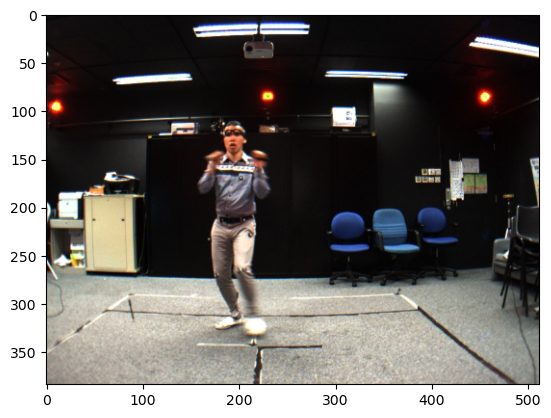

In [31]:
plt.imshow(data[0][0].permute(1,2,0))

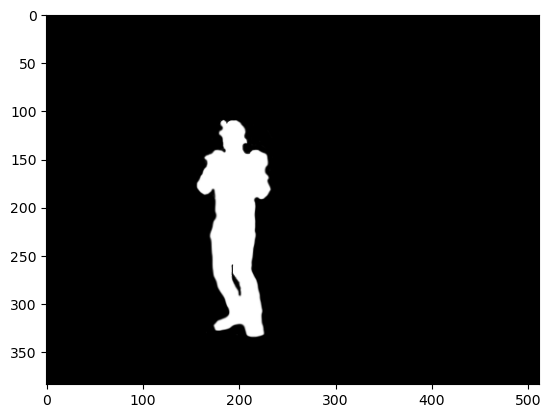

In [29]:
plt.imshow(data[0][1].permute(1,2,0))

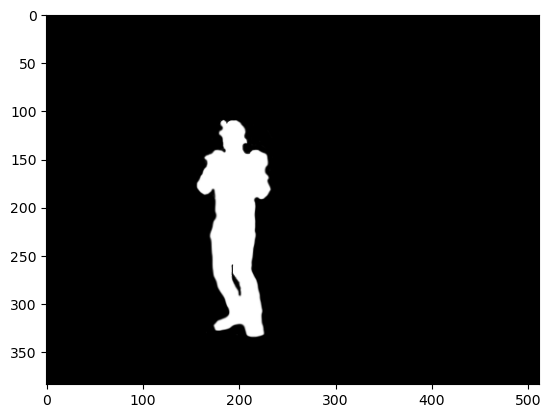

In [60]:
plt.imshow(data[0][1][0:3].permute(1,2,0))